In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
yf.pdr_override()
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df1 = pdr.get_data_yahoo('AAPL', '2011-01-01', '2021-10-31')
df1 = df1[['Open', 'Close']]
df1 = df1.rename(columns = {'Open': 'Open_AAPL', 'Close': 'Close_AAPL'})

df2 = pdr.get_data_yahoo('MSFT', '2011-01-01', '2021-10-31')
df2 = df2[['Open', 'Close']]
df2 = df2.rename(columns = {'Open': 'Open_MSFT', 'Close': 'Close_MSFT'})

df3 = pdr.get_data_yahoo('GOOGL', '2011-01-01', '2021-10-31')
df3 = df3[['Open', 'Close']]
df3 = df3.rename(columns = {'Open': 'Open_GOOGL', 'Close': 'Close_GOOGL'})

df4 = pdr.get_data_yahoo('HON', '2011-01-01', '2021-10-31')
df4 = df4[['Open', 'Close']]
df4 = df4.rename(columns = {'Open': 'Open_HON', 'Close': 'Close_HON'})

df5 = pdr.get_data_yahoo('AMZN', '2011-01-01', '2021-10-31')
df5 = df5[['Open', 'Close']]
df5 = df5.rename(columns = {'Open': 'Open_AMZN', 'Close': 'Close_AMZN'})


df = df1.merge(df2, how = 'inner', on = 'Date')
df = df.merge(df3, how = 'inner', on = 'Date')
df = df.merge(df4, how = 'inner', on = 'Date')
df = df.merge(df5, how = 'inner', on = 'Date')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_AAPL,Close_AAPL,Open_MSFT,Close_MSFT,Open_GOOGL,Close_GOOGL,Open_HON,Close_HON,Open_AMZN,Close_AMZN
Date,,,,,,,,,,
2010-12-31,11.533929,11.520000,27.799999,27.910000,298.668671,297.282288,50.471382,50.681126,181.960007,180.000000
2011-01-03,11.630000,11.770357,28.049999,27.980000,298.538544,302.477478,50.995735,51.682163,181.369995,184.220001
2011-01-04,11.872857,11.831786,27.940001,28.090000,303.113098,301.361359,51.729832,50.986202,186.149994,185.009995
2011-01-05,11.769643,11.928571,27.900000,28.000000,300.335327,304.839844,50.709724,51.834702,184.100006,187.419998
2011-01-06,11.954286,11.918929,28.040001,28.820000,305.645660,307.057068,52.006310,51.825169,186.500000,185.860001
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,148.679993,148.639999,309.359985,308.130005,2751.000000,2748.939941,216.809998,217.539993,3335.000000,3320.370117
2021-10-26,149.330002,149.320007,311.000000,310.109985,2785.270020,2786.169922,218.199997,218.320007,3349.510010,3376.070068
2021-10-27,149.360001,148.850006,316.000000,323.170013,2788.100098,2924.350098,218.100006,215.720001,3388.000000,3392.489990


In [3]:
three_years = df.loc['2011-01-01': '2013-12-31']
three_years = three_years[['Close_AAPL', 'Close_MSFT', 'Close_GOOGL', 'Close_HON', 'Close_AMZN']]

three_years['Return_AAPL'] = three_years['Close_AAPL'].pct_change()
three_years['Return_MSFT'] = three_years['Close_MSFT'].pct_change()
three_years['Return_GOOGL'] = three_years['Close_GOOGL'].pct_change()
three_years['Return_HON'] = three_years['Close_HON'].pct_change()
three_years['Return_AMZN'] = three_years['Close_AMZN'].pct_change()

three_years = three_years[['Return_AAPL', 'Return_MSFT', 'Return_GOOGL', 'Return_HON', 'Return_AMZN']]
three_years = three_years.dropna()
three_years

,Return_AAPL,Return_MSFT,Return_GOOGL,Return_HON,Return_AMZN
Date,,,,,
2011-01-04,0.005219,0.003931,-0.003690,-0.013466,0.004288
2011-01-05,0.008180,-0.003204,0.011543,0.016642,0.013026
2011-01-06,-0.000808,0.029286,0.007273,-0.000184,-0.008324
2011-01-07,0.007161,-0.007634,0.004792,-0.001104,-0.001991
2011-01-10,0.018833,-0.013287,-0.003618,-0.007366,-0.004367
...,...,...,...,...,...
2013-12-24,-0.004245,0.012562,-0.002923,0.008136,-0.009233
2013-12-26,-0.006641,0.009709,0.005055,0.007186,0.013001
2013-12-27,-0.006757,-0.004006,0.000841,0.000439,-0.015604


In [4]:
matrix_of_return_values = np.asmatrix(three_years)
matrix_of_return_values = matrix_of_return_values.T

no_of_asset_classes = 5
no_of_portfolios = 10000

In [5]:
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights = random_asset_weights / random_asset_weights.sum()
    random_asset_weights = np.asmatrix(random_asset_weights) 
    return random_asset_weights 

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values)) 
    
    portfolio_mean = asset_weights * asset_means
    portfolio_mean = portfolio_mean.item()
    
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean /portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    a,b,c = get_portfolio_statistics(random_asset_weights, matrix_of_return_values)
    portfolio_means.append(a)
    portfolio_standard_deviations.append(b)
    portfolio_sharpe_ratios.append(c)

In [6]:
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
print(collection_of_random_asset_weights[index])

[[0.224259   0.0052931  0.30514671 0.17764056 0.28766062]]


In [7]:
portfolio_weights = pd.DataFrame({'AAPL':[0.20648713], 'MSFT': [0.00204026], 'GOOGL': [0.31799489], 'HON': [0.19708109], 'AMZN': [0.27639663]}, index = [three_years.last_valid_index()])
portfolio_weights

,AAPL,MSFT,GOOGL,HON,AMZN
2013-12-31,0.206487,0.00204,0.317995,0.197081,0.276397


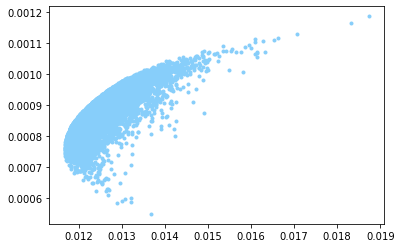

In [8]:
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [9]:
print(portfolio_sharpe_ratios[index])

0.07528619980161162


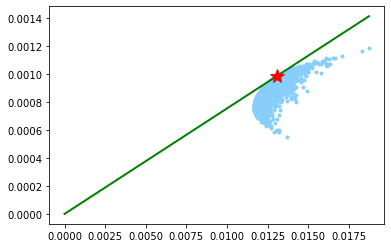

In [10]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x 
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index] , portfolio_means[index] , color= 'red' , marker ='*' , markersize = 15)
plt.show()



****** END OF RED BELT ******



In [11]:
capital = 10000
allocations = capital * portfolio_weights
allocations

,AAPL,MSFT,GOOGL,HON,AMZN
2013-12-31,2064.8713,20.4026,3179.9489,1970.8109,2763.9663


In [12]:
print(df['Close_AAPL'].loc[portfolio_weights.last_valid_index()])
print(df['Close_MSFT'].loc[portfolio_weights.last_valid_index()])
print(df['Close_GOOGL'].loc[portfolio_weights.last_valid_index()])
print(df['Close_HON'].loc[portfolio_weights.last_valid_index()])
print(df['Close_AMZN'].loc[portfolio_weights.last_valid_index()])

no_of_shares = allocations / df[[f'Close_{sym}' for sym in portfolio_weights.columns]].loc[portfolio_weights.last_valid_index()].values
no_of_shares

20.036428451538086
37.40999984741211
560.9158935546875
87.109375
398.7900085449219


,AAPL,MSFT,GOOGL,HON,AMZN
2013-12-31,103.055857,0.545378,5.669208,22.624556,6.930882


In [13]:
seven_years = df.loc['2013-12-31':]
seven_years['Open'] = seven_years['Open_AAPL']*no_of_shares['AAPL'].iloc[0]+ seven_years['Open_MSFT']*no_of_shares['MSFT'].iloc[0]+ seven_years['Open_GOOGL']*no_of_shares['GOOGL'].iloc[0]+ seven_years['Open_HON']*no_of_shares['HON'].iloc[0]+ seven_years['Open_AMZN']*no_of_shares['AMZN'].iloc[0]
seven_years['Close'] = seven_years['Close_AAPL']*no_of_shares['AAPL'].iloc[0]+ seven_years['Close_MSFT']*no_of_shares['MSFT'].iloc[0]+ seven_years['Close_GOOGL']*no_of_shares['GOOGL'].iloc[0]+ seven_years['Close_HON']*no_of_shares['HON'].iloc[0]+ seven_years['Close_AMZN']*no_of_shares['AMZN'].iloc[0]
seven_years = seven_years[['Open', 'Close']]
seven_years

<ipython-input-13-0dbc5bddfa2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_years['Open'] = seven_years['Open_AAPL']*no_of_shares['AAPL'].iloc[0]+ seven_years['Open_MSFT']*no_of_shares['MSFT'].iloc[0]+ seven_years['Open_GOOGL']*no_of_shares['GOOGL'].iloc[0]+ seven_years['Open_HON']*no_of_shares['HON'].iloc[0]+ seven_years['Open_AMZN']*no_of_shares['AMZN'].iloc[0]
<ipython-input-13-0dbc5bddfa2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_years['Close'] = seven_years['Close_AAPL']*no_of

,Open,Close
Date,,
2013-12-31,9910.785901,10000.000000
2014-01-02,9956.642123,9920.956556
2014-01-03,9931.203726,9846.770954
2014-01-06,9861.659570,9870.743474
2014-01-07,9906.871827,9956.173981
...,...,...
2021-10-25,59106.773294,59005.419891
2021-10-26,59500.954120,59691.340267
2021-10-27,59787.324176,60488.379259


Absolute Return of our portfolio: 507.0 %
CAGR of our portfolio: 18.0 %
Information Ratio of our portfolio: 1.139237128923906


<AxesSubplot:xlabel='Date'>

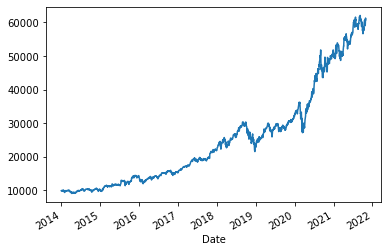

In [14]:
Absolute_Return = (seven_years['Close'].iloc[-1]-capital)/capital
CAGR = ((seven_years['Close'].iloc[-1]/capital)**(252/len(df)))-1
information_ratio = (seven_years.Close.pct_change().mean()/seven_years.Close.pct_change().std())*((252) **0.5)

print('Absolute Return of our portfolio:', np.round(Absolute_Return,2)*100,'%')
print('CAGR of our portfolio:',np.round(CAGR,2)*100,'%')
print('Information Ratio of our portfolio:',information_ratio)

((seven_years.Close.pct_change().dropna()+1).cumprod()*capital).plot()

In [15]:
short_time = 4
long_time = 8
seven_years['Close_Short_Rolling'] = seven_years['Close'].rolling(window = short_time).mean()
seven_years['Close_Long_Rolling'] = seven_years['Close'].rolling(window = long_time).mean()
seven_years['window_diff'] = seven_years['Close_Short_Rolling'] - seven_years['Close_Long_Rolling']
seven_years['Open_1_Change'] = seven_years['Open'] - seven_years['Close'].shift(1)
seven_years = seven_years.dropna()
seven_years

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,window_diff,Open_1_Change
Date,,,,,,
2014-01-10,9984.131868,9888.841972,9942.789823,9926.203785,16.586039,52.316237
2014-01-13,9863.098857,9803.980420,9904.741433,9901.701337,3.040096,-25.743115
2014-01-14,9872.083442,9975.299375,9899.984349,9908.494189,-8.509840,68.103022
2014-01-15,10030.987460,10013.637867,9920.439909,9929.352554,-8.912645,55.688085
2014-01-16,9989.650399,10026.361291,9954.819738,9948.804781,6.014958,-23.987468
...,...,...,...,...,...,...
2021-10-25,59106.773294,59005.419891,59758.654535,59818.293219,-59.638684,-19.954509
2021-10-26,59500.954120,59691.340267,59593.174089,59929.566821,-336.392732,495.534230
2021-10-27,59787.324176,60488.379259,59577.966805,60022.786991,-444.820186,95.983909


In [16]:
X = seven_years.copy()
y = np.where(X.Close.shift(-1) >= X.Close, 1,-1)
index = int(0.3*len(X))
X_train = X.iloc[:index]
X_test = X.iloc[index:]
y_train = y[:index]
y_test = y[index:]
logistic = LogisticRegression()
logistic = logistic.fit(X_train,y_train)

In [17]:
pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))

,0,1
0,Open,[1.3617099415229879e-05]
1,Close,[-0.00016183872523961452]
2,Close_Short_Rolling,[-0.00018293075281567198]
3,Close_Long_Rolling,[0.0003433289792144856]
4,window_diff,[-0.0005262597320301304]
5,Open_1_Change,[0.0004955090759969475]


In [18]:
predictions = logistic.predict(X_test)
print(classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(logistic.score(X_test, y_test))

              precision    recall  f1-score   support

          -1       0.43      0.11      0.18       577
           1       0.58      0.89      0.71       800

    accuracy                           0.57      1377
   macro avg       0.51      0.50      0.44      1377
weighted avg       0.52      0.57      0.48      1377

[[ 65 512]
 [ 85 715]]
0.5664488017429193


In [19]:
results = X_test.copy()
results['c2c_price'] = X_test.Close.shift(-1) - X_test.Close
results['Predictions'] = predictions
results['True_Label'] = y_test
results['Daily_Return'] = results['c2c_price']*results['Predictions']
results['Cumulative_Return'] = results['Daily_Return'].cumsum()
results.dropna(inplace = True)
results

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,window_diff,Open_1_Change,c2c_price,Predictions,True_Label,Daily_Return,Cumulative_Return
Date,,,,,,,,,,,
2016-05-13,13880.774636,13831.269784,13922.347497,13764.809283,157.538214,-41.330533,158.489154,1,1,158.489154,158.489154
2016-05-16,13886.919224,13989.758937,13925.163709,13816.955465,108.208244,55.649440,-200.848443,1,-1,-200.848443,-42.359289
2016-05-17,13990.041089,13788.910495,13883.011096,13853.054717,29.956380,0.282152,31.579029,1,1,31.579029,-10.780259
2016-05-18,13746.861850,13820.489524,13857.607185,13874.020283,-16.413098,-42.048645,-46.786841,1,-1,-46.786841,-57.567101
2016-05-19,13749.363789,13773.702683,13843.215410,13882.781453,-39.566043,-71.125735,111.802587,1,1,111.802587,54.235487
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,60128.265727,59126.727803,60164.341179,59683.013072,481.328107,-420.942670,-121.307912,1,-1,-121.307912,39769.543605
2021-10-25,59106.773294,59005.419891,59758.654535,59818.293219,-59.638684,-19.954509,685.920377,1,1,685.920377,40455.463982
2021-10-26,59500.954120,59691.340267,59593.174089,59929.566821,-336.392732,495.534230,797.038992,1,1,797.038992,41252.502974


****** END OF BLACK BELT ******